# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 20% of the assignment grade.

**Note**: Questions 2-13 rely on your question 1 answer.

In [1]:
import pandas as pd
import numpy as np
import re

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", None) # to display all rows
pd.set_option("display.max_columns", None) # to display all columns
pd.set_option('display.float_format', lambda x: '%.6f' % x) # to avoid scientific notation

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [2]:
def replace_bracket(value):
    a=re.match(r'(.*) \((.*)\)', value)
    if a :
        return a.group(1)
    return value

In [3]:
def Energy_DF():
    Energy = pd.read_excel('Energy Indicators.xls', header=None, skipfooter=0)
    Energy = Energy[18:245].reset_index()[[1,3,4,5]]
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy.replace(to_replace = '...',value = np.nan, inplace=True)

    Energy['Energy Supply'] = Energy['Energy Supply'] * 1000000

    # Energy[Energy['Country'].isin(["Republic of Korea", "United States of America", 
    #                                "United Kingdom of Great Britain and Northern Ireland", 
    #                                "China, Hong Kong Special Administrative Region"])]
    Energy.replace(to_replace = ["Republic of Korea", "United States of America", 
                                 "United Kingdom of Great Britain and Northern Ireland", 
                                 "China, Hong Kong Special Administrative Region"],
                   value = ["South Korea", "United States", "United Kingdom", "Hong Kong"], 
                   inplace=True)
    # Energy[Energy['Country'].isin(["South Korea", "United States", "United Kingdom", "Hong Kong"])]

    # Energy[Energy['Country'].str.match(pat='.* \(.*\)')]['Country']
    Energy['Country'] = Energy['Country'].apply(lambda x:replace_bracket(x))
    # Energy['Country'].iloc[[24,70,98,133,183,221]]

    return Energy

In [4]:
def GDP_DF():
    GDP = pd.read_csv('world_bank.csv', header=None)
    GDP.columns = GDP.iloc[4]
    GDP = GDP[5:].reset_index()
    del GDP['index']
    GDP.columns.name=None
    GDP.columns = GDP.columns[:4].append(GDP.columns[4:].astype('int').astype('str'))
    # GDP[GDP['Country Name'].isin(["Korea, Rep.","Iran, Islamic Rep.","Hong Kong SAR, China"])]
    GDP.replace(to_replace=["Korea, Rep.","Iran, Islamic Rep.","Hong Kong SAR, China"],
                value=["South Korea", "Iran", "Hong Kong"], inplace=True)
    # GDP[GDP['Country Name'].isin(["South Korea", "Iran", "Hong Kong"])]
    GDP = GDP[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
         '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    return GDP
    

In [5]:
def ScimEn_DF():
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    ScimEn = ScimEn.iloc[:15]
    return ScimEn

In [6]:
def answer_one():
    # YOUR CODE HERE
    
    Energy = Energy_DF()
    GDP = GDP_DF()
    ScimEn = ScimEn_DF()
    
    temp1 = pd.merge(ScimEn, Energy, on='Country') # how = inner is default
    final = pd.merge(temp1, GDP, left_on='Country', right_on='Country Name')
    final.set_index('Country', inplace=True)
    final.drop(final[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']], axis = 1, inplace = True)
    final.shape # (15, 20)
    return final
    
    raise NotImplementedError()

In [7]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [8]:
# Cell for autograder.


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [9]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [10]:
def answer_two():
    # YOUR CODE HERE
    
    Sci = pd.read_excel('scimagojr-3.xlsx')
    Energy = Energy_DF()
    GDP = GDP_DF()
    final = answer_one()
    temp1 = pd.merge(Sci, Energy, on='Country') # how = inner is default
    final1 = pd.merge(temp1, GDP, left_on='Country', right_on='Country Name')
    temp2 = pd.merge(Sci, Energy, on='Country', how='outer') 
    final2 = pd.merge(temp2, GDP, left_on='Country', right_on='Country Name', how='outer')
    return final2.shape[0] - final1.shape[0]
    
    raise NotImplementedError()

In [11]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [12]:
def answer_three():
    # YOUR CODE HERE
    final = answer_one()
    avgGDP = final[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1).sort_values(ascending=False)[:15]
    avgGDP.name = 'avgGDP'
    return avgGDP
    
    raise NotImplementedError()

In [13]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [14]:
def answer_four():
    # YOUR CODE HERE
    final = answer_one()
    df = answer_three()
    df.index[5] # as we want to get 6th largest avg GDP
    # df['United Kingdom']
    return final.loc[df.index[5]]['2015'] - final.loc[df.index[5]]['2006']
    
    raise NotImplementedError()

In [15]:
# Cell for autograder.


### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [16]:
def answer_five():
    # YOUR CODE HERE
    final = answer_one()
    return final['Energy Supply per Capita'].mean()
    
    raise NotImplementedError()

In [17]:
# Cell for autograder.


### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [18]:
def answer_six():
    # YOUR CODE HERE
    final = answer_one()
    return (final[final['% Renewable']==final['% Renewable'].max()].index[0], 
            final['% Renewable'].max())
    
    raise NotImplementedError()

In [19]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [20]:
def answer_seven():
    # YOUR CODE HERE
    
    final = answer_one()
    
    final['Ratio'] = final['Self-citations']/final['Citations']
    final['Ratio']
    return (final[final['Ratio']==final['Ratio'].max()].index[0], final['Ratio'].max())
    
    raise NotImplementedError()

In [21]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [22]:
def answer_eight():
    # YOUR CODE HERE
    final = answer_one()
    final['Population'] = final['Energy Supply'] / final['Energy Supply per Capita']
    return final['Population'].nlargest(3)[[-1]].index[0]
    # final['Population'].nlargest(3).index[2] # because index starts from 0
    
    raise NotImplementedError()

In [23]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [24]:
def answer_nine():
    # YOUR CODE HERE
    
    final = answer_one()
    final['Population'] = final['Energy Supply'] / final['Energy Supply per Capita']
    final['Citable docs per Capita'] = final['Citable documents'] / final['Population']
    return final[['Citable docs per Capita','Energy Supply per Capita']].corr(method='pearson').iloc[0][1]
    
    raise NotImplementedError()

In [25]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

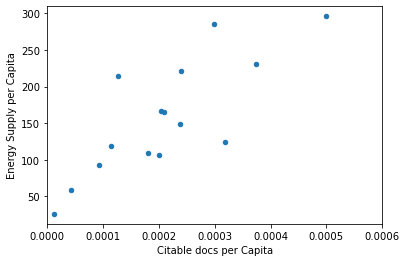

In [26]:
plot9()

In [27]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [28]:
def answer_ten():
    # YOUR CODE HERE
    final = answer_one()
    median = final['% Renewable'].median()
    median
    final['HighRenew'] = np.where(final['% Renewable']>=median,1,0)
    # final['HighRenew'] = (final['% Renewable']>=median).astype('int')
    return final['HighRenew']
    
    raise NotImplementedError()

In [29]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [30]:
def answer_eleven():
    # YOUR CODE HERE
    
    final = answer_one()
    final['Population'] = final['Energy Supply'] / final['Energy Supply per Capita']
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    return final['Population'].groupby(ContinentDict).aggregate([np.size, np.sum, np.mean, np.std])
    
    raise NotImplementedError()

In [31]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [32]:
def answer_twelve():
    # YOUR CODE HERE
    final = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    temp = final['% Renewable'].groupby([ContinentDict, pd.cut(final['% Renewable'], bins=5)]).aggregate({np.size}).dropna().iloc[:,0]
    temp.index = temp.index.set_names(['Continent', '% Renewable'])
    return temp
    
    raise NotImplementedError()


In [33]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 9, "Q12: Wrong result numbers!"


### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [34]:
def answer_thirteen():
    # YOUR CODE HERE
    
    final = answer_one()
    final['Population'] = final['Energy Supply'] / final['Energy Supply per Capita']
    temp = final['Population'].apply('{:,}'.format).astype(dtype='str')
    temp.name = 'PopEst'
    return temp
    
    raise NotImplementedError()

In [35]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [36]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


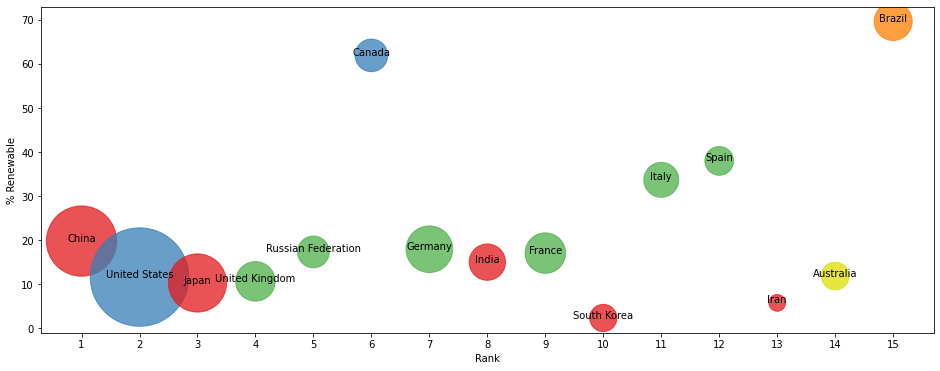

In [37]:
plot_optional()

In [38]:
Energy_DF()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.000000,10.000000,78.669280
1,Albania,102000000.000000,35.000000,100.000000
2,Algeria,1959000000.000000,51.000000,0.551010
3,American Samoa,nan,nan,0.641026
4,Andorra,9000000.000000,121.000000,88.695650
5,Angola,642000000.000000,27.000000,70.909090
6,Anguilla,2000000.000000,136.000000,0.000000
7,Antigua and Barbuda,8000000.000000,84.000000,0.000000
8,Argentina,3378000000.000000,79.000000,24.064520
9,Armenia,143000000.000000,48.000000,28.236060


In [39]:
GDP_DF()

,Country Name,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,nan,nan,nan,nan,2467703910.614530,nan,nan,nan,nan,nan
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4018195653.510150,4021331428.401050,3675727910.506810,3535389132.602410,3346317328.524610,3185604581.520290,3129537611.886200,3127549907.583770,nan,nan
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,10305228125.139200,11721187594.205200,12144482858.180000,14697331940.646400,15936800636.248699,16911126453.227600,19352203805.629398,19731337260.637798,19990317160.675598,20294152243.007198
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,55811028114.647903,68420444001.499496,77874196512.184494,79753199398.139603,82470913120.731400,85702615836.440399,90120963241.218597,96261432368.264496,100886286610.958008,103910558934.020004
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,9771760095.125540,10348293941.585300,11127520474.298100,11500292411.174400,11926953258.916000,12231090567.667200,12404772053.501400,12542465022.373001,12793314322.820499,13120823169.484699
5,Arab World,ARB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1763823829113.090088,1863481356326.669922,1980983302945.669922,2011001139577.909912,2103824906396.060059,2173896465634.169922,2318266914690.419922,2385579629422.560059,2436659330416.810059,2509068276527.700195
6,United Arab Emirates,ARE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,278948949835.963013,287831772785.526001,297018891707.594971,281446423169.576965,286049336038.121033,300946210244.793030,321692225022.966003,335593704978.687012,350931309582.380005,362100323851.567993
7,Argentina,ARG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,378814002617.523987,408988709469.622009,421564889399.940002,421775774944.172974,461640242696.171021,500355477549.572021,504367128523.159973,518919894963.107971,521273744038.473999,nan
8,Armenia,ARM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,8679746345.921900,9873142200.518791,10554389012.520700,9060944166.218409,9260284937.797810,9695518329.746370,10393595649.806299,10736584306.437000,11112364757.038700,11445735699.889601
9,American Samoa,ASM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [40]:
ScimEn_DF()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.700000,138
1,2,United States,96661,94747,792274,265436,8.200000,230
2,3,Japan,30504,30287,223024,61554,7.310000,134
3,4,United Kingdom,20944,20357,206091,37874,9.840000,139
4,5,Russian Federation,18534,18301,34266,12422,1.850000,57
5,6,Canada,17899,17620,215003,40930,12.010000,149
6,7,Germany,17027,16831,140566,27426,8.260000,126
7,8,India,15005,14841,128763,37209,8.580000,115
8,9,France,13153,12973,130632,28601,9.930000,114
9,10,South Korea,11983,11923,114675,22595,9.570000,104


In [41]:
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700000,138,127191000000.000000,93.000000,19.754910,3992331462570.890137,4559041383517.929688,4997775145605.959961,5459247267275.139648,6039658508485.589844,6612490294273.650391,7124977970399.610352,7672447738017.419922,8230120617793.519531,8797998940421.279297
United States,2,96661,94747,792274,265436,8.200000,230,90838000000.000000,286.000000,11.570980,14792303791800.000000,15055395304800.000000,15011490541400.000000,14594842181900.000000,14964372000000.000000,15204019634600.000000,15542161722300.000000,15773666098800.000000,16156618476000.000000,16548573278300.000000
Japan,3,30504,30287,223024,61554,7.310000,134,18984000000.000000,149.000000,10.232820,5496541517363.309570,5617035943770.730469,5558526873313.820312,5251308399909.320312,5498717815809.769531,5473738114222.049805,5569101602926.179688,5644658523313.419922,5642884448582.190430,5669563143140.969727
United Kingdom,4,20944,20357,206091,37874,9.840000,139,7920000000.000000,124.000000,10.600470,2419630700401.729980,2482203235475.899902,2470614405284.299805,2367047611711.990234,2403504326328.799805,2450911011124.850098,2479808627472.189941,2533370110012.359863,2605643189894.930176,2666333396477.129883
Russian Federation,5,18534,18301,34266,12422,1.850000,57,30709000000.000000,214.000000,17.288680,1385792607182.580078,1504071117741.300049,1583004071092.110107,1459199142720.260010,1524917468442.010010,1589942641764.290039,1645875899596.270020,1666934123163.159912,1678708855070.860107,1616148858033.770020
Canada,6,17899,17620,215003,40930,12.010000,149,10431000000.000000,296.000000,61.945430,1564468853329.449951,1596739898466.320068,1612713061250.239990,1565144676082.310059,1613406134731.120117,1664086754804.889893,1693132927878.080078,1730687770724.129883,1773485821199.770020,1792608764608.810059
Germany,7,17027,16831,140566,27426,8.260000,126,13261000000.000000,165.000000,17.901530,3332890754966.890137,3441560834437.089844,3478809377483.439941,3283339933774.830078,3417298013245.029785,3542371125827.810059,3556723774834.439941,3567317390728.479980,3624386278145.700195,3685555907284.770020
India,8,15005,14841,128763,37209,8.580000,115,33195000000.000000,26.000000,14.969080,1265894322131.090088,1374865195244.500000,1428360609657.800049,1549482541544.699951,1708458876829.919922,1821872415623.620117,1924235460945.250000,2051981849791.689941,2200616575310.970215,2367206118959.060059
France,9,13153,12973,130632,28601,9.930000,114,10597000000.000000,166.000000,17.020280,2607839735099.339844,2669423841059.600098,2674637086092.709961,2595966887417.220215,2646994701986.750000,2702031788079.470215,2706968211920.529785,2722566887417.220215,2729631788079.470215,2761185430463.580078


In [42]:
answer_two()

156

In [43]:
answer_three()

Country
United States        15364344302990.000000
China                 6348608932836.099609
Japan                 5542207638235.175781
Germany               3493025339072.848145
France                2681724635761.588867
United Kingdom        2487906661418.417480
Brazil                2189794143774.904785
Italy                 2120175089933.776123
India                 1769297396603.859863
Canada                1660647466307.511963
Russian Federation    1565459478480.660889
Spain                 1418078278145.694092
Australia             1164042729991.427002
South Korea           1106714508244.852051
Iran                   444155754051.095032
Name: avgGDP, dtype: float64

In [44]:
answer_four()

246702696075.3999

In [45]:
answer_five()

157.6

In [46]:
answer_six()

('Brazil', 69.64803)

In [47]:
answer_seven()

('China', 0.6893126179389422)

In [48]:
answer_eight()

'United States'

In [49]:
answer_nine()

0.7940010435442943

In [50]:
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int32

In [51]:
answer_eleven()

,size,sum,mean,std
Asia,5.000000,2898666386.610600,579733277.322120,679097888.366095
Australia,1.000000,23316017.316017,23316017.316017,nan
Europe,6.000000,457929667.216372,76321611.202729,34647667.065623
North America,2.000000,352855249.480250,176427624.740125,199669644.856668
South America,1.000000,205915254.237288,205915254.237288,nan


In [52]:
answer_twelve()

Continent      % Renewable     
Asia           (2.212, 15.753]    4.000000
               (15.753, 29.227]   1.000000
Australia      (2.212, 15.753]    1.000000
Europe         (2.212, 15.753]    1.000000
               (15.753, 29.227]   3.000000
               (29.227, 42.701]   2.000000
North America  (2.212, 15.753]    1.000000
               (56.174, 69.648]   1.000000
South America  (56.174, 69.648]   1.000000
Name: size, dtype: float64

In [53]:
answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object